# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('C:/Users/hecsa/Springboard/Springboard Github/Springboard/1585247986_Frequentist_Case_Study/Frequentist Case Study/insurance2.csv')

In [14]:
medical.shape

(1338, 8)

In [16]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

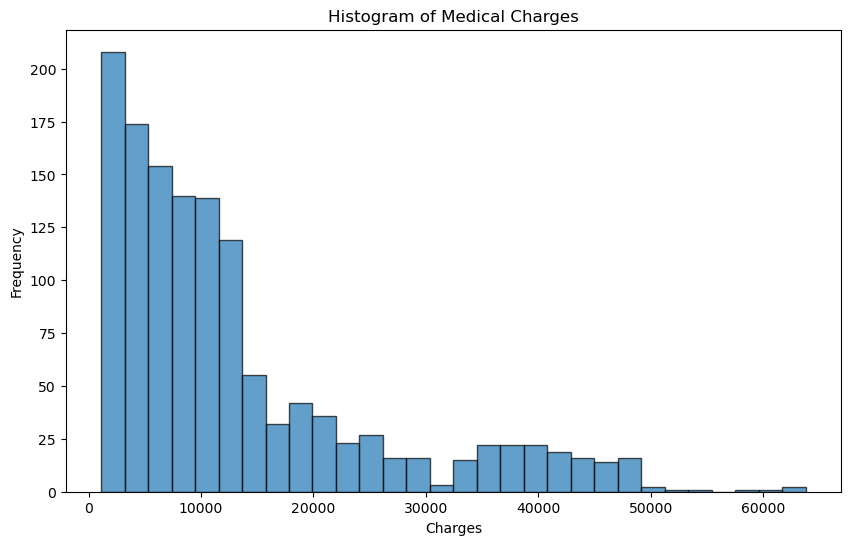

Mean of charges: 13270.422265141257
Standard deviation of charges: 12110.011236693994


In [18]:
# Plot the histogram of the charges
plt.figure(figsize=(10, 6))
plt.hist(medical['charges'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and standard deviation of the charges
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'], ddof=1)  # ddof=1 for sample standard deviation

print(f'Mean of charges: {mean_charges}')
print(f'Standard deviation of charges: {std_charges}')

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In [22]:
# Mean of the Null Hypothesis
mu = 12000

# Calculate the sample mean and std dev
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'], ddof=1)
n = len(medical['charges'])

# Calculate the t-test statistic
t_statistic = (mean_charges - mu) / (std_charges / np.sqrt(n))

# Calculate the p-value 
p_value = t.cdf(t_statistic, df=n-1)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Set the significance level
alpha = 0.05

# If else statement to display the final decision
if p_value < alpha:
    print('Reject the null hypthesis. There is evidence that the mean charge is less than 12,000.')
else:
    print('Fail to reject the null hypothesis . There is no evidence that the emean charge is less than 12,000.')
    

t-statistic: 3.837351719658534
p-value: 0.9999349141739535
Fail to reject the null hypothesis . There is no evidence that the emean charge is less than 12,000.


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [ ]:
# Since the adminsitrator's concern is regarding whether the average charge has fallen below a threshold, a one sided confidence interval is appropriate. The concern is only about the charges being less than 12,000, and not about them being more than 12,000.

In [26]:
# Calculate the critical value for a one-sided 95% confidence interval
alpha = 0.05
critical_value = t.ppf(1 - alpha, df=n-1)

# Calculate the margin of error
margin_of_error = critical_value * (std_charges / np.sqrt(n))

# Calculate the lower bound of the one-sided confidence interval
confidence_interval_lower_bound = mean_charges - margin_of_error

print(f"Critical value (one-sided): {critical_value}")
print(f"Margin of error: {margin_of_error}")
print(f"Lower bound of the one-sided 95% confidence interval for the mean: {confidence_interval_lower_bound}")

# Address whether the administrator should be concerned or not
if confidence_interval_lower_bound < 12000:
    print("The lower bound of the one-sided 95% confidence interval is below 12,000. The administrator shold be concerned.")
else:
    print("The lower bound of the one-sided 95% confidence interval is above 12,000. The administrator should not be concerned.")


Critical value (one-sided): 1.6459941145571317
Margin of error: 544.9350813250251
Lower bound of the one-sided 95% confidence interval for the mean: 12725.48718381623
The lower bound of the one-sided 95% confidence interval is above 12,000. The administrator should not be concerned.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

In [34]:
# Start by splitting the data into insured and uninsured groups
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

# Next, calculate the sample sizes, means, and the std devs
n1 = len(insured)
n2 = len(uninsured)
mean1 = np.mean(insured)
mean2 = np.mean(uninsured)
std1 = np.std(insured, ddof=1)
std2 = np.std(uninsured, ddof=1)

# Next, calculate the pooled std dev
pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 -2))

# Next, calculate the t-test statistic
t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

# Next, calculate the degrees of freedom
df = n1 + n2 - 2

# Now, calculate the p-value for a two-tailed test
p_value = 2 * (1 - t.cdf(abs(t_statistic), df=df))

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Now, set the significance level 
alpha = 0.05

# Final Decision/outcome
if p_value < alpha:
    print("Reject the null hypothesis. There is evidencethat insured and uninsured patientsare charged different amounts.")
else:
    print("Fail to reject the null hypthesis. There is no evidence that insured and uninsured patients are charged different amounts.")


t-statistic: 11.893299030876715
p-value: 0.0
Reject the null hypothesis. There is evidencethat insured and uninsured patientsare charged different amounts.


In [ ]:
# We are assuming that the variances of the charges for insured and uninsured patients are equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [ ]:
# Manual calculation

In [36]:
# Split the data into insured and uninsured groups
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

# Calculate sample sizes, means, and standard deviations
n1 = len(insured)
n2 = len(uninsured)
mean1 = np.mean(insured)
mean2 = np.mean(uninsured)
std1 = np.std(insured, ddof=1)
std2 = np.std(uninsured, ddof=1)

# Calculate the pooled standard deviation
pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

# Calculate the t-test statistic
t_statistic_manual = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

# Calculate the degrees of freedom
df = n1 + n2 - 2

# Calculate the p-value for a two-tailed test
p_value_manual = 2 * (1 - t.cdf(abs(t_statistic_manual), df=df))

print(f"Manual calculation - t-statistic: {t_statistic_manual}")
print(f"Manual calculation - p-value: {p_value_manual}")


Manual calculation - t-statistic: 11.893299030876715
Manual calculation - p-value: 0.0


In [ ]:
# Calculation using "scipy.stats.ttest_ind"

In [38]:
from scipy.stats import ttest_ind

# Perform the two-sample t-test using scipy.stats
t_statistic_scipy, p_value_scipy = ttest_ind(insured, uninsured, equal_var=True)

print(f"scipy.stats.ttest_ind - t-statistic: {t_statistic_scipy}")
print(f"scipy.stats.ttest_ind - p-value: {p_value_scipy}")

# Verify that the results are the same
assert np.isclose(t_statistic_manual, t_statistic_scipy), "The t-statistics do not match!"
assert np.isclose(p_value_manual, p_value_scipy), "The p-values do not match!"


scipy.stats.ttest_ind - t-statistic: 11.893299030876712
scipy.stats.ttest_ind - p-value: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

In [ ]:
# There isn't a direct functon for performing a z-test in scipy.stats.
# Z-Test vs. T-Test
# The t-test is used when sample sizes are small and when the population std dev is unknown to us. It instead uses the sample std dev to obtain an estimate of the population std dev. It is more flexible and more commonly used based on reaseach found online and in AoS.
# The z-test is used when we have a larger sample size that is usually greater than 30(n>30), and when we know the population std dev. Due to the CLT, the samle mean distribution approximates a normal distribution. Z-tests can be done manually by making use of the z-score and the std normal distribution.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test